In [21]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
sys.path.append('..')
from os.path import join
from matplotlib import pyplot as plt
from collections import defaultdict
import pandas as pd
import os
import seaborn as sns
import pickle as pkl
from tqdm import tqdm
import viz
import dvu
dvu.set_style()
import utils_analyze

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# note: current best results are in oct17
# save_dir = '/home/chansingh/mntv1/deep-fMRI/results/linear_models/subsamp_oct17'
# save_dir = '/home/chansingh/mntv1/deep-fMRI/results/linear_models/probing_oct25_sub_0.05'
# save_dir = '/home/chansingh/mntv1/deep-fMRI/results/linear_models/probing_oct28_sub_0.05'
save_dir = '/home/chansingh/mntv1/deep-fMRI/results/linear_models/probing_nov2_sub_0.05'
d = utils_analyze.load_results(save_dir)

100%|██████████| 68/68 [00:00<00:00, 903.04it/s]


In [23]:
baselines = pd.read_pickle('../processed/data_table.pkl')

In [24]:
baselines

,dset,n_train,n_test,y_majority_frac_train,y_majority_frac_test,len_avg_train,len_std_train,n_classes,ex1
0,emotion,16000,2000,0.335125,0.044000,96.845812,55.903206,6,i didnt feel humiliated
1,rotten_tomatoes,8530,1066,0.500000,0.062485,113.971630,51.049239,2,the rock is destined to be the 21st century's ...
2,tweet_eval,9000,1000,0.579667,0.063667,122.836000,67.195292,2,@user nice new signage. Are you not concerned ...
3,sst2,67349,872,0.557826,0.006593,53.505590,43.407057,2,hide new secretions from the parental units
4,probing-subj_number,82010,8088,0.502122,0.049543,84.631106,114.204086,2,Coming from a xenophobic race that possesses t...
5,probing-word_content,83868,8357,0.001145,0.000119,83.859005,95.657506,1000,"It just hadn 't seemed important, and he didn ..."
6,probing-obj_number,80124,8014,0.500836,0.050135,83.402626,101.859128,2,"Money would replace the drugs in the bags, onc..."
7,probing-past_present,85700,8552,0.500152,0.049918,71.204177,75.142904,2,"She shone her light around the space, followin..."
8,probing-sentence_length,87408,8653,0.171426,0.017298,87.035123,165.933377,6,But it was not here.
9,probing-top_constituents,70185,7451,0.051222,0.005557,88.590240,508.294106,20,"I wanted to start asking questions now, but fo..."


**View all params**

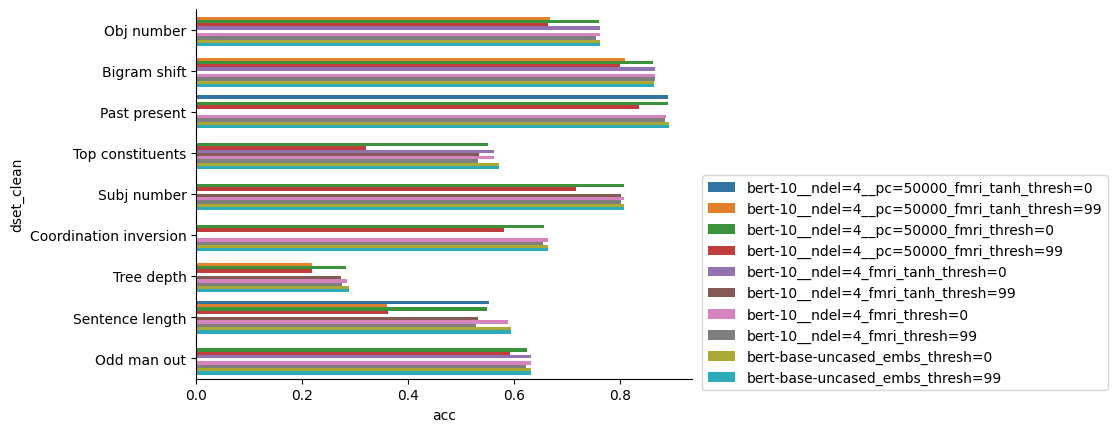

In [37]:
# note, if sweeping over more params need to include them in the groupby
d['dset_clean'] = d['dset'].map(viz.dset_rename)
hue = 'model_full'
sns.barplot(data=d, y='dset_clean', x='acc', hue='model_full', orient='h', hue_order=sorted(d[hue].unique())) #, palette=['gray', 'C0'])
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
# plt.savefig('decoding_accs.pdf', bbox_inches='tight')
plt.show()